Introduction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

Data preprocessing

In [2]:
df=pd.read_csv('red_wine_data.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
print("The shape of dataset is:",df.shape)

The shape of dataset is: (1599, 12)


In [9]:
df=df.drop_duplicates()
print(f"rows and columns after dropping duplicates: " ,df.shape)

rows and columns after dropping duplicates:  (1359, 12)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [11]:
df['quality']=df['quality'].apply(lambda x:1if x>=7 else 0)

In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
numerical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="float64" or df.dtypes[x]=="int64":
        numerical_cols.append(x)
print(f"\nNumber data type columns are:\n",numerical_cols)


Number data type columns are:
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,0.135394
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.342270
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [16]:
df.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,0.135394
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.342270
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [17]:
df.nunique().to_frame("unique values")

,unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


<Axes: >

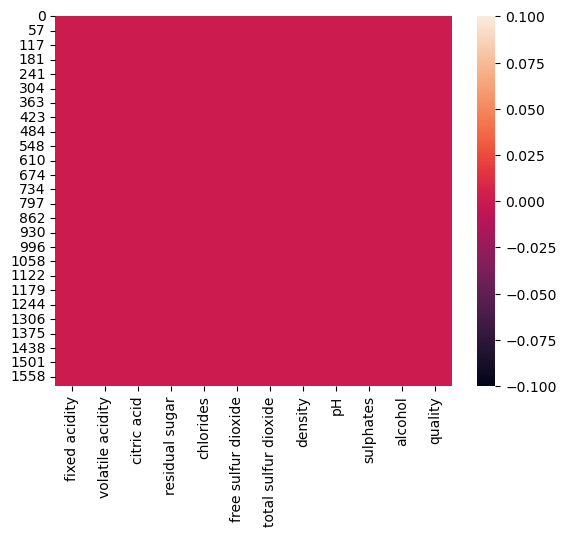

In [18]:
sns.heatmap(df.isnull())

In [19]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
13.8     1
13.4     1
4.7      1
15.0     1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    50
0.078    44
0.074    43
0.084    40
0.076    39
         ..
0.360     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     121
5.0      88
15.0     65
12.0     64
10.0     63
7.0      61
9.0      55
16.0     53
17.0

Feature Selection

In [20]:
correlation_matrix=df.corr()
correlation_with_target=correlation_matrix['quality'].abs().sort_values(ascending=False)
print("correlation with target variable (quality):")
print(correlation_with_target)

correlation with target variable (quality):
quality                 1.000000
alcohol                 0.409926
volatile acidity        0.267344
citric acid             0.203561
sulphates               0.201551
density                 0.158052
total sulfur dioxide    0.135877
fixed acidity           0.116120
chlorides               0.096806
free sulfur dioxide     0.072771
pH                      0.054131
residual sugar          0.052811
Name: quality, dtype: float64


In [21]:
rf_classifier=RandomForestClassifier(random_state=42)
x=df.drop(columns=['quality'])
y=df['quality']
rf_classifier.fit(x,y)
importances=rf_classifier.feature_importances_
indices=(-importances).argsort()
print("feature ranking based on tree-based feature importance:")
for f in range(x.shape[1]):
    print(f"{f+1}.{x.columns[indices[f]]}:{importances[indices[f]]}")

feature ranking based on tree-based feature importance:
1.alcohol:0.17312848583016832
2.sulphates:0.12767879960756243
3.volatile acidity:0.10284429557726568
4.density:0.0932256913382688
5.citric acid:0.08608089722727134
6.total sulfur dioxide:0.07720736044460057
7.fixed acidity:0.07700019289801004
8.chlorides:0.07153241185163942
9.residual sugar:0.06777379283359942
10.pH:0.06275186868623593
11.free sulfur dioxide:0.06077620370537814


Model Selection

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
rf_classifier=RandomForestClassifier(random_state=42)
rf_classifier.fit(x,y)
y_pred=rf_classifier.predict(x_test)
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print("\nClasification report:")
print(classification_report(y_test,y_pred))

confusion matrix:
[[238   0]
 [  0  34]]

Clasification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00        34

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272



Hyperpaameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {
    'n_estimators': [50, 100, 200],'criterion':['gini','entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':['auto']
}

rf_classifier = RandomForestClassifier(random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

test_accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

best_rf_classifier = RandomForestClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50, random_state=42)

best_rf_classifier.fit(x_train, y_train)

test_accuracy = best_rf_classifier.score(x_test, y_test)
print("Test Accuracy with Best Hyperparameters:", test_accuracy)

Evaluation(ROC-AUC)

In [32]:
from sklearn.metrics import recall_score,roc_auc_score,roc_curve
from sklearn import metrics

In [33]:
y_pred = best_rf_classifier.predict(x_test)



# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)



# ROC-AUC
y_pred_proba = best_rf_classifier.predict_proba(x_test)[:, 1]  # Probability of positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)

Recall: 0.4411764705882353
ROC-AUC: 0.8919920909540288


In [39]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1-score: 0.8000000000000002
ROC-AUC: 0.8
Confusion Matrix:
[[4 1]
 [1 4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



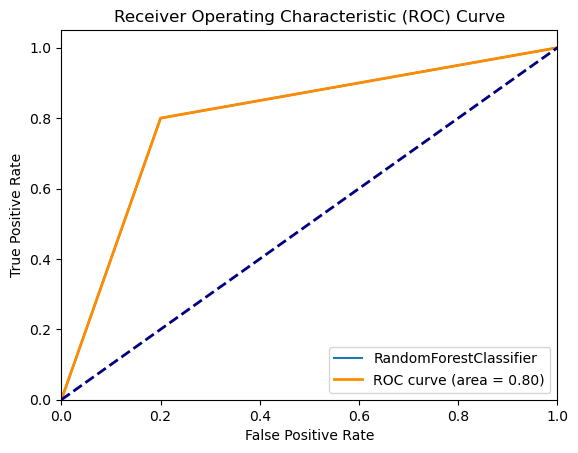

In [40]:
y_true = [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1, 1, 0]

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Saving the model(conclusion)

In [54]:
import pickle as pkl

In [64]:
filename='red_wine.pkl'

In [65]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

filename = 'red_wine.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf, file)

In [66]:
filename = 'red_wine.pkl'
with open(filename, 'rb') as file:
    rf_loaded = pickle.load(file)

In [67]:
loaded_model=pickle.load(open('red_wine.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

91.54411764705883


the key findings and outcomes of the project, highlighting the effectiveness of the Random Forest classifier in predicting the quality of red wine based on physicochemical properties.